# Nâng cao hình ảnh cơ bản bằng các phép toán

Các kỹ thuật xử lý hình ảnh tận dụng các phép toán để đạt được các kết quả khác nhau. Thông thường, chúng ta sẽ có được phiên bản nâng cao của hình ảnh bằng một số phép toán cơ bản. Chúng ta sẽ xem xét một số phép toán cơ bản thường được sử dụng trong các quy trình xử lý thị giác máy tính. Trong sổ bài này, chúng ta sẽ đề cập đến:

* Các phép toán số học như phép cộng, phép nhân
* Ngưỡng và che
* Các phép toán bitwise như OR, AND, XOR

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

### Hình ảnh gốc

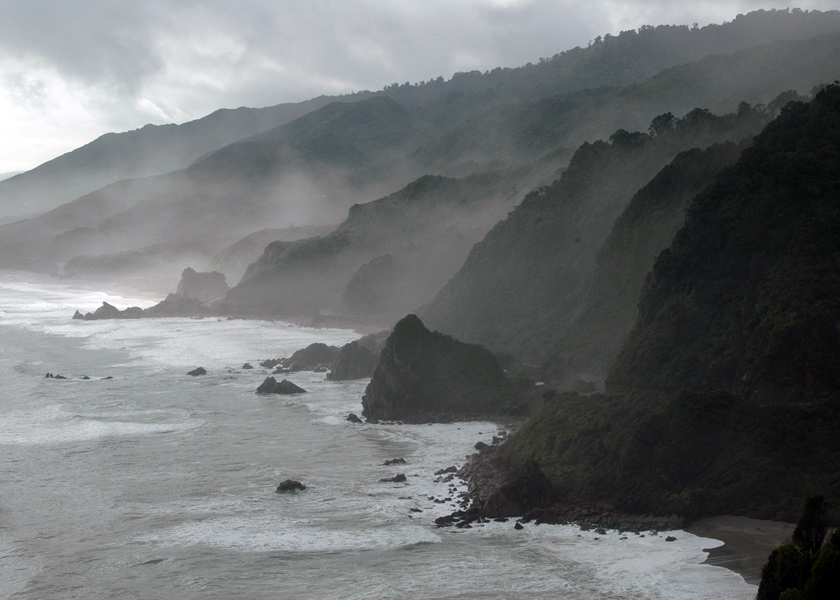

In [38]:
img_bgr = cv2.imread("image/New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Hiển thị 18x18 pixel image.
Image(filename="image/New_Zealand_Coast.jpg")

## Phép cộng hoặc Độ sáng
Phép toán đầu tiên chúng ta thảo luận là phép cộng đơn giản các hình ảnh. Điều này dẫn đến việc tăng hoặc giảm độ sáng của hình ảnh vì cuối cùng chúng ta sẽ tăng hoặc giảm giá trị cường độ của mỗi pixel theo cùng một lượng. Vì vậy, điều này sẽ dẫn đến sự tăng/giảm độ sáng toàn cục.

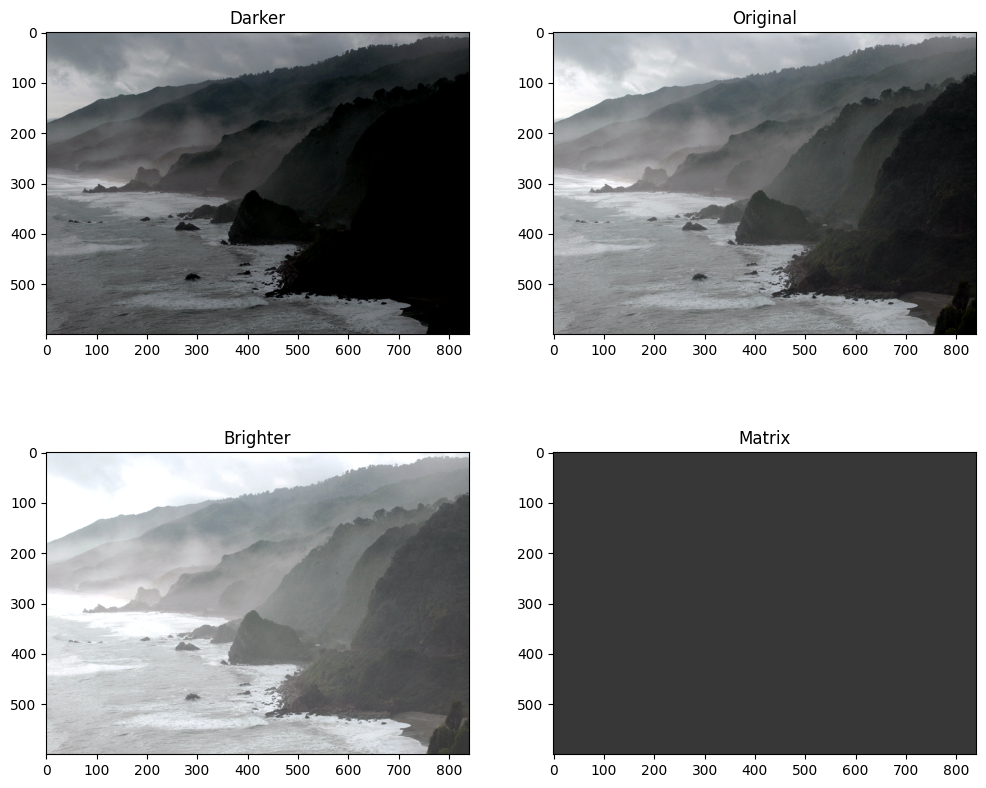

In [39]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 55
img_rgb_brighter = np.uint8(cv2.add(img_rgb, matrix))
img_rgb_darker   = np.uint8(cv2.subtract(img_rgb, matrix))


# Hiển thị ảnh
plt.figure(figsize=[12, 10])
plt.subplot(221); plt.imshow(img_rgb_darker);   plt.title("Darker");
plt.subplot(222); plt.imshow(img_rgb);          plt.title("Original");
plt.subplot(223); plt.imshow(img_rgb_brighter); plt.title("Brighter");
plt.subplot(224); plt.imshow(matrix);           plt.title("Matrix");

## Phép nhân hoặc Độ tương phản
Cũng giống như phép cộng có thể dẫn đến thay đổi độ sáng, phép nhân có thể được sử dụng để cải thiện độ tương phản của hình ảnh.

Độ tương phản là sự khác biệt về giá trị cường độ của các điểm ảnh trong hình ảnh. Nhân các giá trị cường độ với một hằng số có thể làm cho sự khác biệt lớn hơn hoặc nhỏ hơn (nếu hệ số nhân < 1).

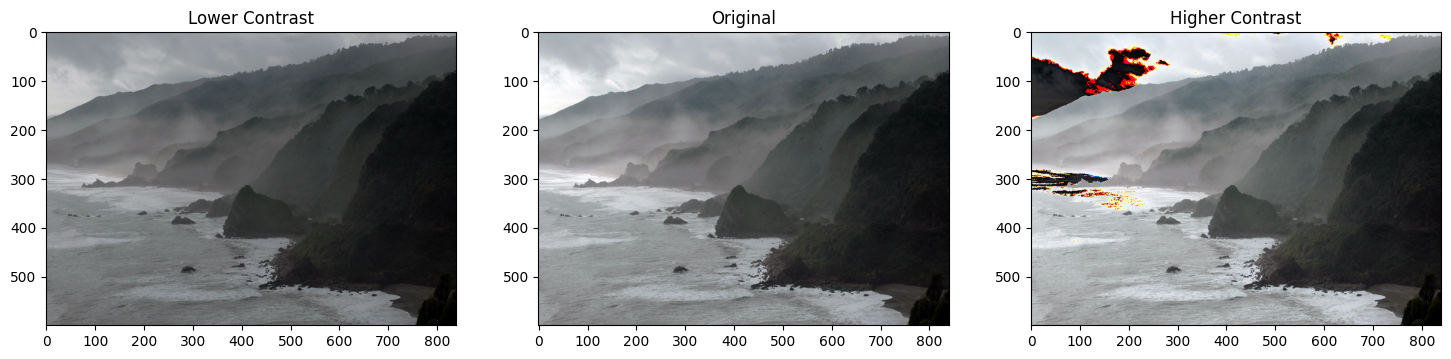

In [40]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_contast))

# Hiển thị ảnh
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);   plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);          plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast");

### Chuyện gì đã xảy ra?
Bạn có thấy màu sắc kỳ lạ ở một số vùng của hình ảnh sau khi nhân không?

Vấn đề là sau khi nhân, các giá trị vốn đã cao lại trở nên lớn hơn 255. Do đó, vấn đề tràn số. Chúng ta khắc phục điều này như thế nào?

### Xử lý tràn bằng cách sử dụng `np.clip`

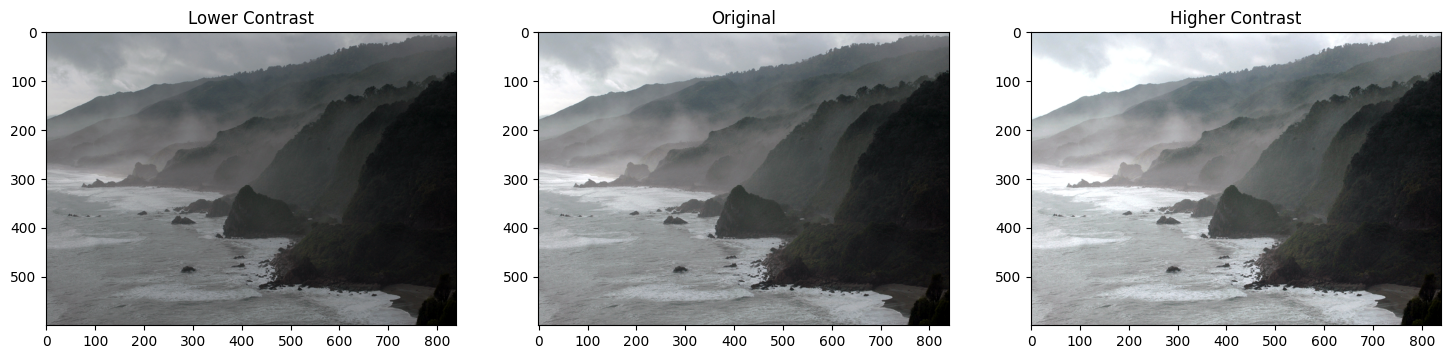

In [41]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contast = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contast), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);        plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher); plt.title("Higher Contrast");

## Ngưỡng ảnh


Thresholding là kỹ thuật giúp bạn chuyển ảnh từ ảnh xám (grayscale) sang ảnh nhị phân (chỉ có trắng và đen – 0 và 255). Điều này giúp phân vùng ảnh, tạo mặt nạ hoặc tách đối tượng ra khỏi nền.

### Ngưỡng đơn giản
#### Cú pháp hàm

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: Mảng đầu ra có cùng kích thước và kiểu và cùng số kênh với `src`.  
`retval`: Giá trị ngưỡng đã được dùng

Hàm có **4 đối số bắt buộc**:

1. `src`: mảng đầu vào (nhiều kênh, số thực 8 bit hoặc 32 bit).

2. `thresh`: giá trị ngưỡng.

3. `maxval`: giá trị tối đa để sử dụng với các loại ngưỡng THRESH_BINARY và THRESH_BINARY_INV.

4. `type`: loại ngưỡng (xem ThresholdTypes).

### Ngưỡng thích ứng
Khi ảnh không đều sáng (độ sáng thay đổi theo vùng), ngưỡng cố định không hiệu quả. Ta cần dùng Adaptive Threshold để tính ngưỡng khác nhau cho từng vùng nhỏ của ảnh.
#### Cú pháp hàm

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst` Ảnh đích có cùng kích thước và cùng loại với src.

Hàm có **6 đối số bắt buộc**:
1. `src`: Ảnh kênh đơn 8 bit nguồn.

2. `maxValue`: Giá trị khác không được gán cho các pixel mà điều kiện được đáp ứng

3. `adaptiveMethod`: Thuật toán ngưỡng thích ứng để sử dụng, xem AdaptiveThresholdTypes. BORDER_REPLICATE | BORDER_ISOLATED được sử dụng để xử lý ranh giới.

4. `thresholdType:` Kiểu ngưỡng phải là THRESH_BINARY hoặc THRESH_BINARY_INV, hãy xem ThresholdTypes.

5. `blockSize`: Kích thước của vùng lân cận pixel được sử dụng để tính giá trị ngưỡng cho pixel: 3, 5, 7, v.v.

6. `C`: Hằng số trừ khỏi giá trị trung bình hoặc giá trị trung bình có trọng số (xem chi tiết bên dưới). Thông thường, giá trị này là số dương nhưng cũng có thể là số không hoặc số âm.

### Tài liệu OpenCV

<a href="https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html" target="_blank">Liên kết tài liệu</a>

100.0
(572, 800)


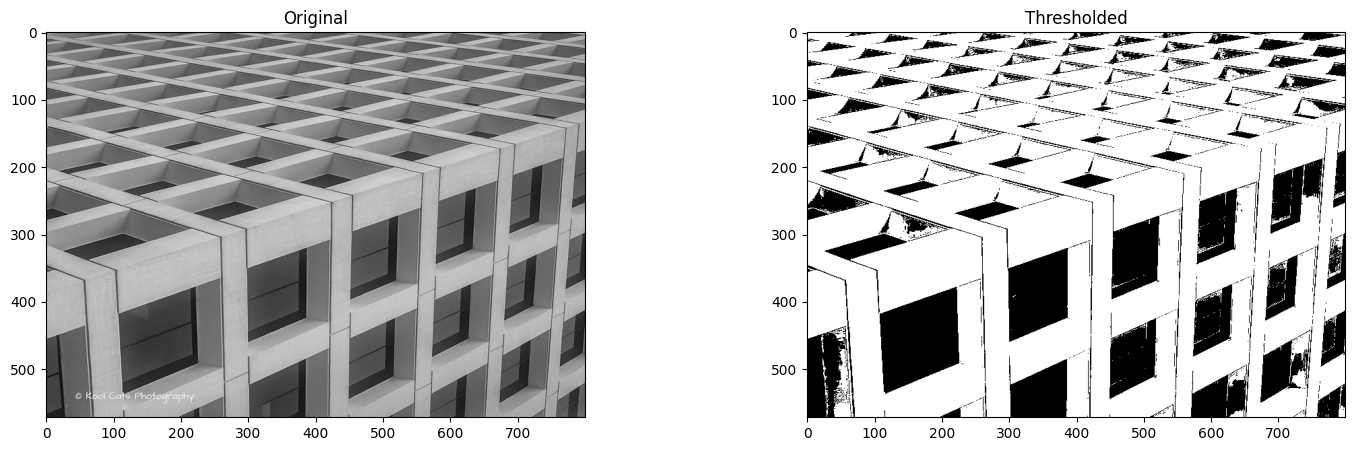

In [42]:
img_read = cv2.imread("image/building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Hiển thị ảnh
plt.figure(figsize=[18, 5])

plt.subplot(121); plt.imshow(img_read, cmap="gray");   plt.title("Original")
plt.subplot(122); plt.imshow(img_thresh, cmap="gray"); plt.title("Thresholded")

print(retval)
print(img_thresh.shape)

Text(0.5, 1.0, 'cv2')

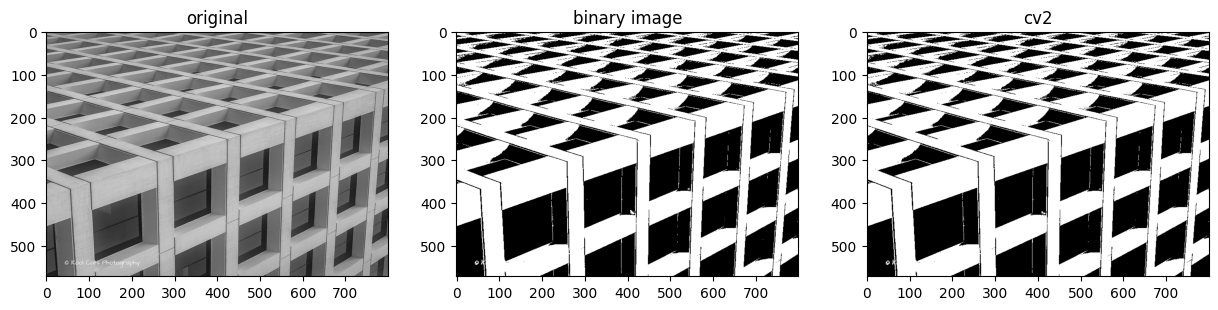

In [43]:
img = img_read
img_binary = np.zeros(img.shape)
retval,dst = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 127:
            img_binary[i][j] = 0
        else:
            img_binary[i][j] = 255

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(img, cmap="gray");        plt.title("original")
plt.subplot(132); plt.imshow(img_binary, cmap="gray"); plt.title("binary image")
plt.subplot(133); plt.imshow(dst, cmap="gray");        plt.title("cv2")   

## Ứng dụng: Trình đọc bản nhạc


Giả sử bạn muốn xây dựng một ứng dụng có thể đọc (giải mã) bản nhạc. Điều này tương tự như
Nhận dạng ký tự quang học (OCR) cho các tài liệu văn bản, trong đó mục tiêu là nhận dạng các ký tự văn bản. Trong cả hai ứng dụng, một trong những bước đầu tiên trong quy trình xử lý là cô lập thông tin quan trọng trong hình ảnh của tài liệu (tách thông tin đó khỏi nền). Nhiệm vụ này có thể được thực hiện bằng các kỹ thuật ngưỡng. Chúng ta hãy xem một ví dụ.

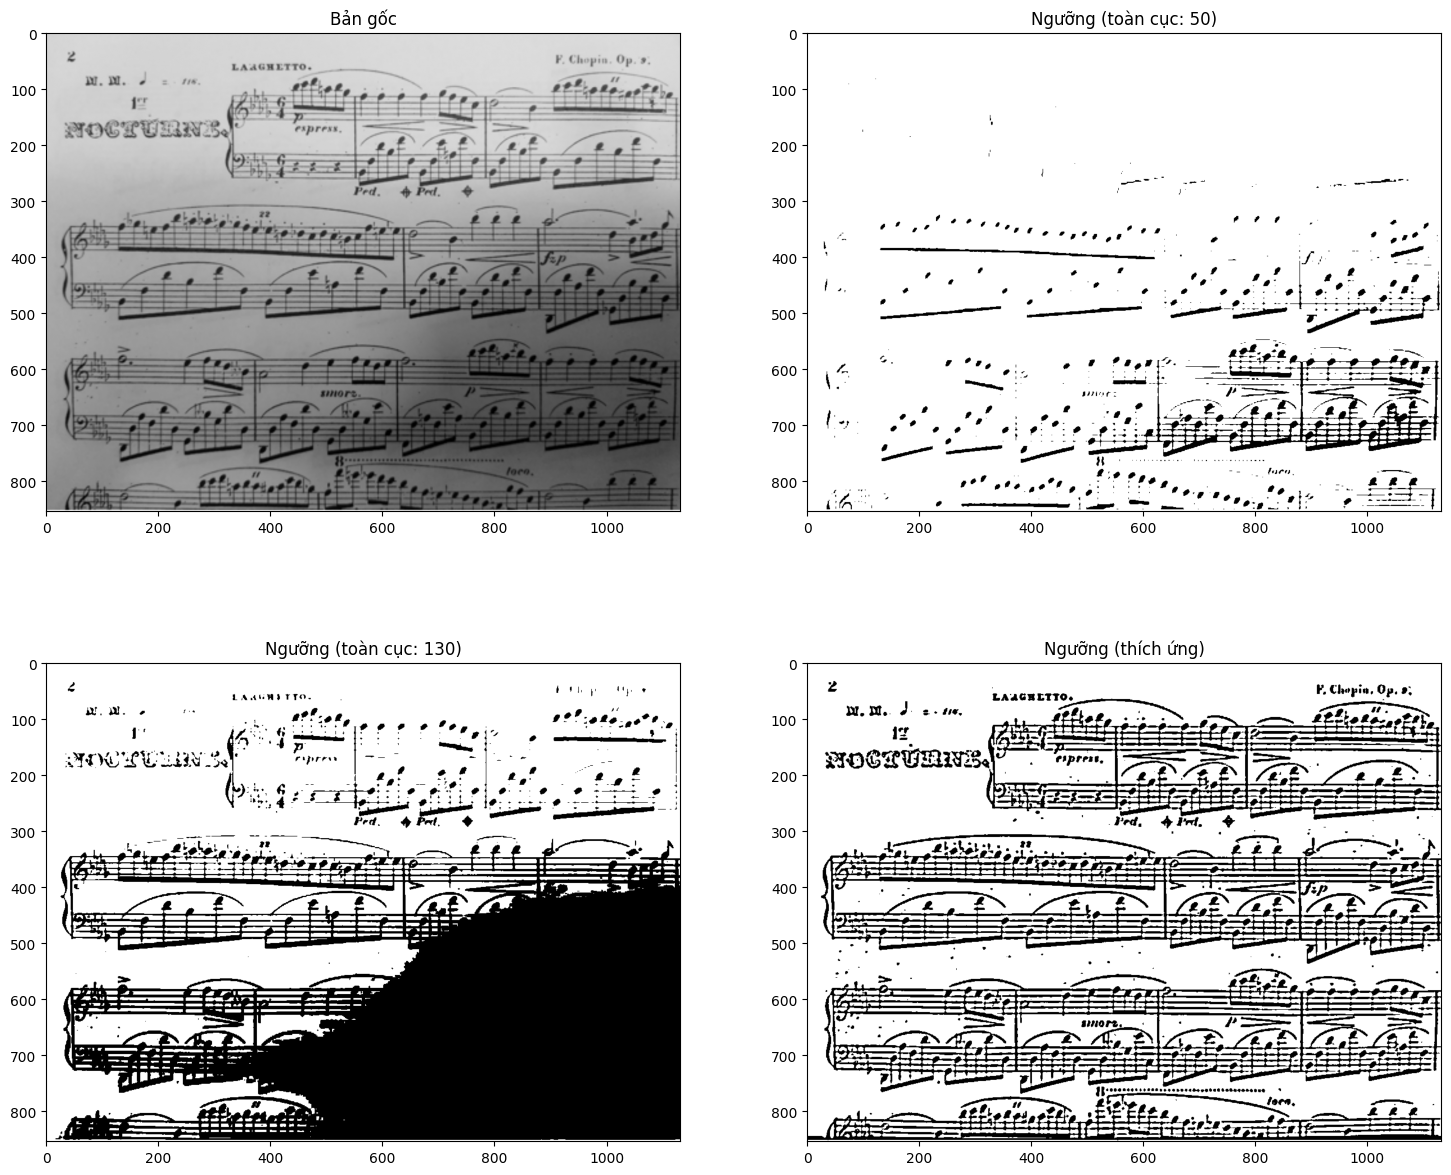

In [44]:
# Đọc hình ảnh gốc
img_read = cv2.imread("image/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Thực hiện ngưỡng toàn cục
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Thực hiện ngưỡng toàn cục
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Thực hiện ngưỡng thích ứng
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)

# Hiển thị hình ảnh
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read, cmap="gray"); plt.title("Bản gốc");
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray"); plt.title("Ngưỡng (toàn cục: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap="gray"); plt.title("Ngưỡng (toàn cục: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Ngưỡng (thích ứng)");

## Các phép toán bitwise

### Cú pháp hàm

Ví dụ API cho `cv2.bitwise_and()`. Các hàm khác bao gồm: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Mảng đầu ra có cùng kích thước và kiểu với các mảng đầu vào.

Hàm có **2 đối số bắt buộc**:

1. `src1`: mảng đầu vào đầu tiên hoặc một số vô hướng.

2. `src2`: mảng đầu vào thứ hai hoặc một số vô hướng.

Một đối số tùy chọn quan trọng là:

1. `mask`: phép toán tùy chọn mask, mảng kênh đơn 8 bit, chỉ định các phần tử của mảng đầu ra cần thay đổi.

### Tài liệu OpenCV

1. <a href="https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html" target="_blank">Các phép toán số học trên hình ảnh</a>

2. <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14" target="_blank">hàm bitwise_and(...)</a>

(200, 499)


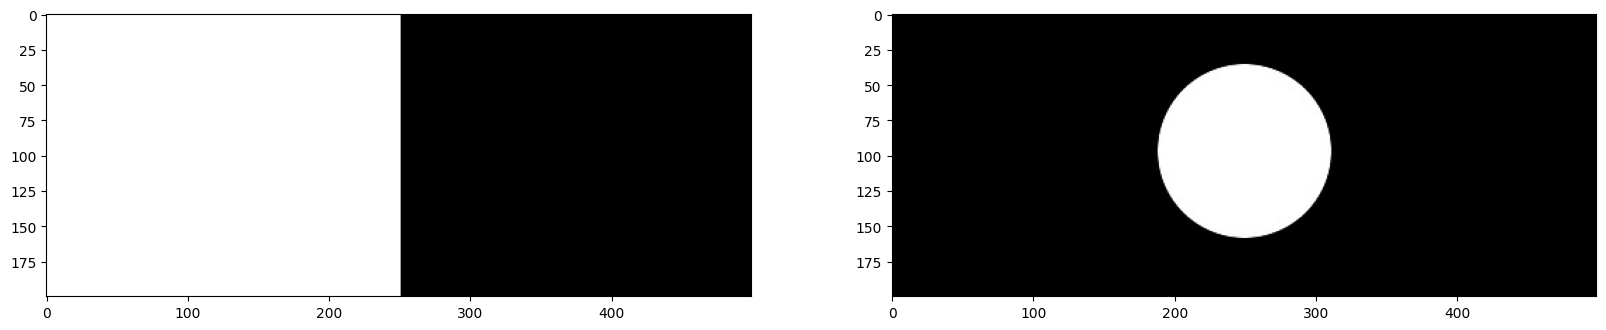

In [45]:
img_rec = cv2.imread("image/rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("image/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

### Toán tử AND bitwise

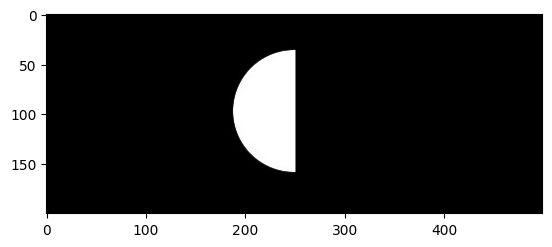

In [46]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### Toán tử OR bitwise

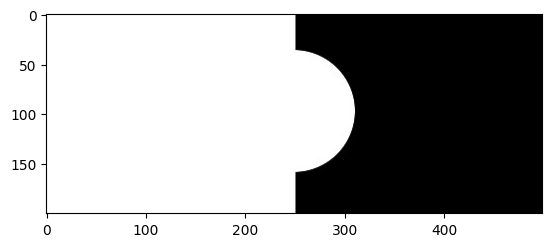

In [47]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### Toán tử XOR bitwise

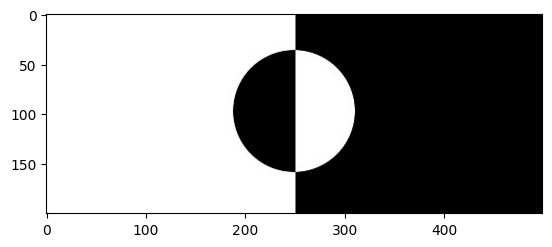

In [48]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

## Ứng dụng: Chỉnh sửa logo

Trong phần này, mình sẽ hướng dẫn bạn cách tô chữ màu trắng của logo Coca-Cola bên dưới bằng hình ảnh nền.

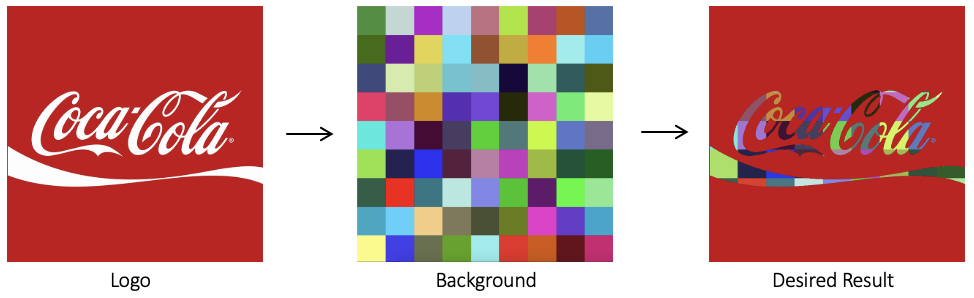

In [49]:
Image(filename='image/Logo_Manipulation.png')

### Đọc hình ảnh nền trước

(700, 700, 3)


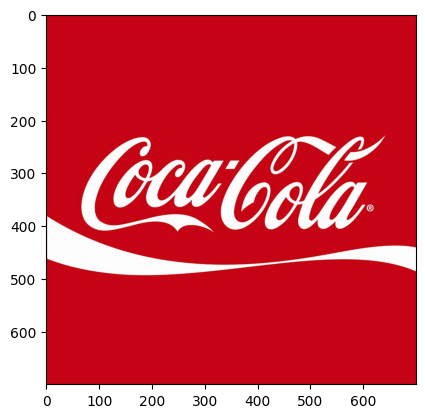

In [50]:
img_bgr = cv2.imread("image/coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

### Đọc hình nền

(700, 700, 3)


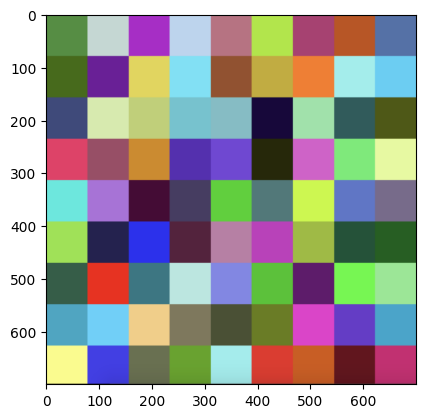

In [51]:
# Đọc trong hình ảnh nền cheackerboad màu
img_background_bgr = cv2.imread("image/checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Thay đổi kích thước hình nền thành cùng kích thước với hình ảnh logo
img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Tạo Mặt nạ cho Hình ảnh gốc

(700, 700)


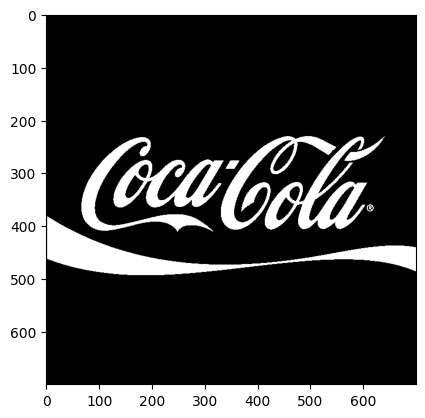

In [52]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Áp dụng ngưỡng toàn cục để tạo mặt nạ nhị phân của logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

### Đảo ngược Mặt nạ

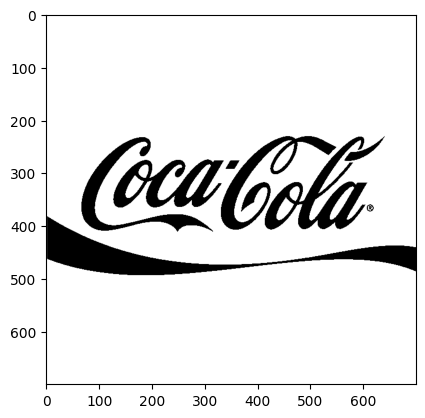

In [53]:
# Tạo mặt nạ đảo ngược
img_mask_inv = cv2.bitwise_not(img_mask)
#img_mask_inv = img_mask
plt.imshow(img_mask_inv, cmap="gray")

### Áp dụng nền cho Mặt nạ

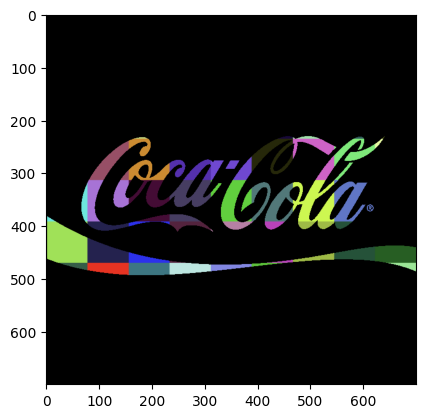

In [54]:
# Tạo nền nhiều màu "phía sau" chữ logo
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### Tách biệt tiền cảnh khỏi hình ảnh

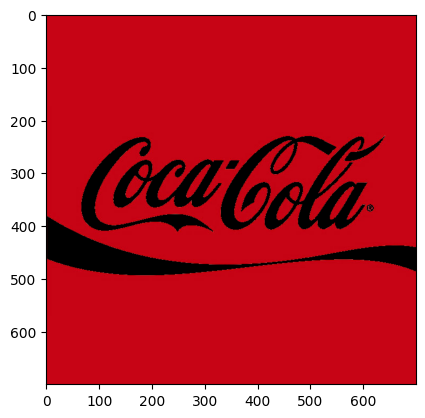

In [55]:
# Tách nền trước (màu đỏ khỏi ảnh gốc) bằng cách sử dụng mặt nạ đảo ngược
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### Kết quả: Hợp nhất Tiền cảnh và Hậu cảnh

True

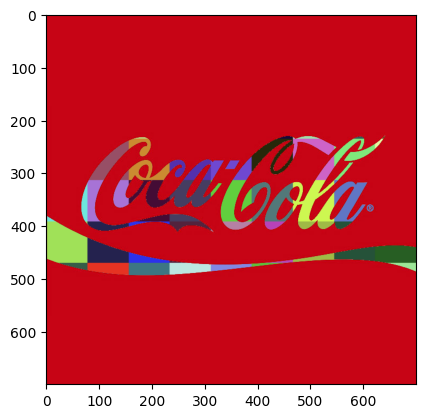

In [56]:
# Cộng hai kết quả trước đó để có được kết quả cuối cùng
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("image/logo_final.png", result[:, :, ::-1])